# US Text Data

14,858 records were classified as US researchers. In previous notebooks, this was accomplished by extracting author addresses and determining which resided in the US and which reside outside the US.

In [1]:
import pandas as pd

import nltk
from collections import Counter
from nltk.corpus import stopwords
from nltk import FreqDist
from nltk.util import ngrams
from nltk.stem import WordNetLemmatizer

import matplotlib.pyplot as plt

import numpy as np
import scipy

sw = stopwords.words("english")

In [2]:
data=pd.read_csv("Full_US_Records.csv", 
                 usecols= ['Article Title','Source Title','Author Keywords','Abstract',
                          'Times Cited, All Databases','Publisher', 'First_A_Country'])

In [3]:
data

,Article Title,Source Title,Author Keywords,Abstract,"Times Cited, All Databases",Publisher,First_A_Country
0,Genome-wide SNPs resolve spatiotemporal patter...,EVOLUTIONARY APPLICATIONS,DArT; genetic connectivity; highly migratory; ...,Genomic methodologies offer unprecedented oppo...,14,WILEY,VA USA
1,The competitive consumption and fetishism of w...,JOURNAL OF CONSUMER CULTURE,Commodity fetishism; competitive consumption; ...,This article argues that trophy hunting is not...,9,SAGE PUBLICATIONS LTD,UT USA
2,Ecological Zoos and the Limits of the Public T...,ETHICS POLICY & ENVIRONMENT,Public trust doctrine; wildlife management; to...,The Public Trust Doctrine is the key normative...,0,"ROUTLEDGE JOURNALS, TAYLOR & FRANCIS LTD",UT USA
3,Strategies for managing marine disease,ECOLOGICAL APPLICATIONS,disease ecology; marine conservation; marine w...,The incidence of emerging infectious diseases ...,1,WILEY,USA
4,Wolves of the Sea: Managing human-wildlife con...,MARINE POLICY,Competition; Depredation; Human-wildlife confl...,Human-wildlife conflict has been receiving inc...,29,ELSEVIER SCI LTD,USA
...,...,...,...,...,...,...,...
14853,Carbon budget of the Harvard Forest Long-Term ...,ECOLOGICAL MONOGRAPHS,belowground production; carbon cycling; climat...,"How, where, and why carbon (C) moves into and ...",32,WILEY,USA
14854,Crop pests and predators exhibit inconsistent ...,PROCEEDINGS OF THE NATIONAL ACADEMY OF SCIENCE...,agroecology; biodiversity; biological control;...,The idea that noncrop habitat enhances pest co...,315,NATL ACAD SCIENCES,USA
14855,SAFETY OF MULTIPLE-DOSE INTRAMUSCULAR KETOPROF...,JOURNAL OF ZOO AND WILDLIFE MEDICINE,NaN,Sea turtles are frequently presented for rehab...,3,AMER ASSOC ZOO VETERINARIANS,USA
14856,Repeated large-scale mechanical treatment of i...,SCIENCE OF THE TOTAL ENVIRONMENT,Carbon; Freshwater wetland; Management tradeof...,Invasive species management typically aims to ...,0,ELSEVIER,USA


## Keyword Data

In [4]:
keywords=data['Author Keywords'] ##saving just the keywords column

In [6]:
keyword_data=[] ##creating a list to store string of data

for item in keywords:  #Make everything in the column  a string of text
    string=str(item)
    keyword_data.append(string)
    
len(keyword_data)

14858

In [7]:
keyword_data[0]

'DArT; genetic connectivity; highly migratory; large pelagic fish; population genomics; SNPs; striped marlin; temporal stability'

In [8]:
tokens=nltk.word_tokenize(str(keyword_data))

In [9]:
cleaned_tokens=[] ##Space to store clean tokens

for w in tokens:
        if w not in sw and w.isalpha(): #Removing tokens including stopwords and punctuation
            cleaned_tokens.append(w.lower())    ##Make everything lowercase

In [10]:
cleaned_tokens[:20]

['genetic',
 'connectivity',
 'highly',
 'migratory',
 'large',
 'pelagic',
 'fish',
 'population',
 'genomics',
 'snps',
 'striped',
 'marlin',
 'temporal',
 'stability',
 'fetishism',
 'competitive',
 'consumption',
 'conspicuous',
 'consumption',
 'trophy']

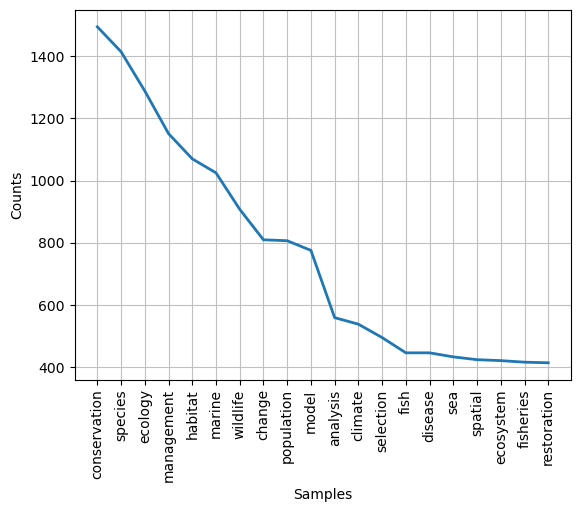

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [11]:
#Visualizing the most common keywords

fdist = FreqDist(cleaned_tokens)
    
    
fdist.plot(20)

### Bigrams - Keyword Data

In [12]:
keyword_bigrams=[]

for words in keyword_data:
    tokens = nltk.word_tokenize(words)
    tokens = [t.lower() for t in tokens if t not in sw]
    word_l = WordNetLemmatizer()
    tokens = [word_l.lemmatize(t) for t in tokens if t.isalpha()]

    bi_grams = list(ngrams(tokens, 2))
    
    
    keyword_bigrams.append(bi_grams)

len(keyword_bigrams)
 ##currently bigrams is a list of lists of bigrams

14858

In [13]:
# how to flatten list of lists
 
# using list comprehension
all_keyword_bigrams = [item for sublist in keyword_bigrams for item in sublist]
all_keyword_bigrams

# counting all bigrams
counter = Counter(all_keyword_bigrams)
counter.most_common(30)

[(('climate', 'change'), 596),
 (('protected', 'area'), 310),
 (('endangered', 'specie'), 273),
 (('coral', 'reef'), 232),
 (('invasive', 'specie'), 222),
 (('stable', 'isotope'), 210),
 (('specie', 'distribution'), 204),
 (('marine', 'protected'), 169),
 (('habitat', 'selection'), 168),
 (('ecosystem', 'service'), 149),
 (('fishery', 'management'), 148),
 (('gulf', 'mexico'), 137),
 (('life', 'history'), 133),
 (('marine', 'mammal'), 128),
 (('distribution', 'model'), 127),
 (('sic', 'sic'), 127),
 (('remote', 'sensing'), 123),
 (('camera', 'trap'), 122),
 (('wildlife', 'management'), 121),
 (('resource', 'selection'), 120),
 (('movement', 'ecology'), 116),
 (('sea', 'turtle'), 114),
 (('population', 'dynamic'), 109),
 (('home', 'range'), 107),
 (('conservation', 'planning'), 107),
 (('habitat', 'use'), 100),
 (('citizen', 'science'), 99),
 (('food', 'web'), 93),
 (('ocean', 'acidification'), 93),
 (('national', 'park'), 91)]

### Trigrams - Keyword Data

In [14]:
keyword_trigrams=[]

for words in keyword_data:
    tokens = nltk.word_tokenize(words)
    tokens = [t.lower() for t in tokens if t not in sw]
    word_l = WordNetLemmatizer()
    tokens = [word_l.lemmatize(t) for t in tokens if t.isalpha()]

    tri_grams = list(ngrams(tokens, 3))
    
    
    keyword_trigrams.append(tri_grams)

In [15]:
# flatten list of lists
 
# using list comprehension
all_keyword_trigrams = [item for sublist in keyword_trigrams for item in sublist]

# counting all bigrams
counter = Counter(all_keyword_trigrams)
counter.most_common(30)

[(('marine', 'protected', 'area'), 169),
 (('specie', 'distribution', 'model'), 123),
 (('sic', 'sic', 'sic'), 120),
 (('resource', 'selection', 'function'), 51),
 (('stable', 'isotope', 'analysis'), 50),
 (('harmful', 'algal', 'bloom'), 46),
 (('endangered', 'specie', 'act'), 42),
 (('passive', 'acoustic', 'monitoring'), 40),
 (('specie', 'distribution', 'modeling'), 32),
 (('population', 'viability', 'analysis'), 32),
 (('emerging', 'infectious', 'disease'), 31),
 (('marine', 'spatial', 'planning'), 31),
 (('conservation', 'reserve', 'program'), 31),
 (('chronic', 'wasting', 'disease'), 30),
 (('effective', 'population', 'size'), 30),
 (('integrated', 'population', 'model'), 29),
 (('generalized', 'additive', 'model'), 28),
 (('ecological', 'niche', 'model'), 28),
 (('climate', 'change', 'conservation'), 28),
 (('single', 'nucleotide', 'polymorphism'), 27),
 (('natural', 'resource', 'management'), 25),
 (('national', 'wildlife', 'refuge'), 25),
 (('sea', 'level', 'rise'), 22),
 (('co

## Abstract Data

In [3]:
abstract=data['Abstract']

abstract_strings=[] ##creating a list to store string of data

for item in abstract:  #Make everything in the column  a string of text
    string=str(item)
    abstract_strings.append(string)
       
abstract_strings[1]

"This article argues that trophy hunting is not an ahistorical phenomenon. Hunting for sport became popular among US elites in the late 1800s. Since this time, in addition to animal trophies being displayed as evidence of one's economic and cultural capital, these commodities have served as symbolic evidence of their owner's courage, skill, and fortitude. Currently, the hunting industry (i.e. sporting goods retailers, weapons manufacturers, and advertising supported media) seeks to perpetuate and expand these perceptions. Displaying animal trophies is unlike many other forms of competitive consumption, such as displaying expensive jewelry, in that the hunting industry has attempted to create the often false perception that these commodities required their owners to conquer dangerous and cunning opponents. Trophy hunting is unlike many other sports, in that economic resources, as opposed to skill, are often the primary factor in determining one's success. Therefore, the use values of an

In [17]:
tokens=nltk.word_tokenize(str(abstract_strings)) ##tokenize all of the text strings
len(tokens)


cleaned_tokens=[] ##Space to store clean tokens

for w in tokens:
        if w not in sw and w.isalpha(): #Removing tokens including stopwords and punctuation
            cleaned_tokens.append(w.lower())    ##Make everything lowercase

In [19]:
print(len(tokens))
print(len(cleaned_tokens))

4115234
2295439


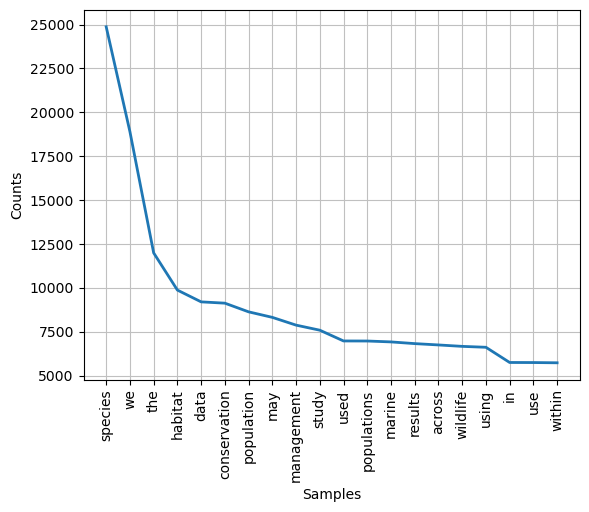

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [20]:
fdist = FreqDist(cleaned_tokens)
    
    
fdist.plot(20)

In [25]:
#removing unnecessary words

additional_stopwords=['the','we','study','in','results','this','using','used','also', 'may','two','high','however','important','found',
                     'our','use','within','across','showed','higher','one','based','three','effects','among','studies']

clean_tokens_2 = []
for token in cleaned_tokens:
    if token not in additional_stopwords:
        clean_tokens_2.append(token)

In [26]:
# counting all tokens
token_counter = Counter(clean_tokens_2)
token_counter.most_common(30)

[('species', 24875),
 ('habitat', 9876),
 ('data', 9205),
 ('conservation', 9131),
 ('population', 8637),
 ('management', 7880),
 ('populations', 6975),
 ('marine', 6924),
 ('wildlife', 6670),
 ('areas', 5593),
 ('fish', 5313),
 ('model', 4796),
 ('ecological', 4718),
 ('sites', 4555),
 ('abundance', 4533),
 ('environmental', 4464),
 ('potential', 4453),
 ('models', 4336),
 ('increased', 4250),
 ('range', 4217),
 ('spatial', 4060),
 ('time', 4021),
 ('change', 3971),
 ('changes', 3800),
 ('survival', 3781),
 ('size', 3747),
 ('associated', 3737),
 ('rates', 3727),
 ('patterns', 3700),
 ('provide', 3672)]

### Bigrams - Abstract Data

In [11]:
abstract_bigrams=[]

for words in abstract_strings:
    tokens = nltk.word_tokenize(words)
    tokens = [t.lower() for t in tokens if t not in sw]
    word_l = WordNetLemmatizer()
    tokens = [word_l.lemmatize(t) for t in tokens if t.isalpha()]

    bi_grams = list(ngrams(tokens, 2))
    
    
    abstract_bigrams.append(bi_grams)

len(abstract_bigrams)
 ##currently bigrams is a list of lists of bigrams

14858

In [12]:
# how to flatten list of lists
 
# using list comprehension
all_abstract_bigrams = [item for sublist in abstract_bigrams for item in sublist]

# counting all bigrams
counter = Counter(all_abstract_bigrams)
counter.most_common(30)

[(('our', 'result'), 2113),
 (('we', 'found'), 1853),
 (('we', 'used'), 1793),
 (('climate', 'change'), 1768),
 (('united', 'state'), 1577),
 (('this', 'study'), 1200),
 (('result', 'suggest'), 1194),
 (('we', 'also'), 1137),
 (('protected', 'area'), 1007),
 (('these', 'result'), 902),
 (('north', 'america'), 886),
 (('life', 'history'), 880),
 (('coral', 'reef'), 774),
 (('specie', 'richness'), 767),
 (('growth', 'rate'), 755),
 (('home', 'range'), 751),
 (('in', 'study'), 733),
 (('habitat', 'use'), 725),
 (('degree', 'c'), 720),
 (('our', 'finding'), 669),
 (('spatial', 'scale'), 666),
 (('genetic', 'diversity'), 660),
 (('c', 'the'), 652),
 (('environmental', 'condition'), 647),
 (('food', 'web'), 631),
 (('in', 'addition'), 625),
 (('study', 'area'), 606),
 (('conservation', 'effort'), 601),
 (('endangered', 'specie'), 600),
 (('population', 'size'), 600)]

In [15]:
##Removing some irrelevant bigrams

bad_bigrams=[('we', 'also'), ('in', 'study'),('in', 'addition'),('we', 'used'),('published', 'elsevier'),
('our', 'result'),('we', 'found'),('the', 'result'),('this', 'study'),('our', 'study'), ('degree', 'c'), ('present', 'study')
            ,('result', 'suggest'),('these', 'result'), ('result', 'showed'),('result', 'show'),('study', 'area'),
            ('all', 'right'),('right', 'reserved'),('our', 'finding'),('a', 'total'),('elsevier', 'all'),('c', 'elsevier'),
            ('first', 'time'), ('the', 'present'), ('specie', 'the'),('in', 'contrast'),('the', 'study'),('result', 'indicate'),
            ('important', 'role'), ('study', 'provides'),('c', 'the'),('we', 'examined'),('we', 'conducted'),('wildlife','society'),
            ('the','wildlife')]

clean_abstract_bigrams = []
for bigram in all_abstract_bigrams:
    if bigram not in bad_bigrams:
        clean_abstract_bigrams.append(bigram)

In [16]:
bigram_counter = Counter(clean_abstract_bigrams)
bigram_counter.most_common(30)

[(('climate', 'change'), 1768),
 (('united', 'state'), 1577),
 (('protected', 'area'), 1007),
 (('north', 'america'), 886),
 (('life', 'history'), 880),
 (('coral', 'reef'), 774),
 (('specie', 'richness'), 767),
 (('growth', 'rate'), 755),
 (('home', 'range'), 751),
 (('habitat', 'use'), 725),
 (('spatial', 'scale'), 666),
 (('genetic', 'diversity'), 660),
 (('environmental', 'condition'), 647),
 (('food', 'web'), 631),
 (('conservation', 'effort'), 601),
 (('endangered', 'specie'), 600),
 (('population', 'size'), 600),
 (('body', 'size'), 568),
 (('gulf', 'mexico'), 563),
 (('sea', 'turtle'), 559),
 (('marine', 'ecosystem'), 557),
 (('conservation', 'management'), 549),
 (('population', 'dynamic'), 546),
 (('ecosystem', 'service'), 536),
 (('case', 'study'), 508),
 (('spatial', 'temporal'), 507),
 (('specie', 'distribution'), 498),
 (('microbial', 'community'), 496),
 (('habitat', 'selection'), 491),
 (('community', 'composition'), 477)]

### Trigrams - Abstract Data

In [4]:
abstract_trigrams=[]

for words in abstract_strings:
    tokens = nltk.word_tokenize(words)
    tokens = [t.lower() for t in tokens if t not in sw]
    word_l = WordNetLemmatizer()
    tokens = [word_l.lemmatize(t) for t in tokens if t.isalpha()]

    tri_grams = list(ngrams(tokens, 3))
    
    
    abstract_trigrams.append(tri_grams)

In [5]:
# flatten list of lists
 
# using list comprehension
all_abstract_trigrams = [item for sublist in abstract_trigrams for item in sublist]

# counting all bigrams
counter = Counter(all_abstract_trigrams)
counter.most_common(30)

[(('our', 'result', 'suggest'), 566),
 (('the', 'wildlife', 'society'), 472),
 (('c', 'the', 'wildlife'), 428),
 (('our', 'result', 'indicate'), 295),
 (('marine', 'protected', 'area'), 287),
 (('specie', 'conservation', 'concern'), 236),
 (('we', 'also', 'found'), 226),
 (('these', 'result', 'suggest'), 223),
 (('all', 'right', 'reserved'), 218),
 (('national', 'wildlife', 'refuge'), 216),
 (('endangered', 'specie', 'act'), 211),
 (('elsevier', 'all', 'right'), 204),
 (('sea', 'surface', 'temperature'), 180),
 (('fish', 'wildlife', 'service'), 175),
 (('our', 'result', 'show'), 171),
 (('our', 'finding', 'suggest'), 167),
 (('population', 'growth', 'rate'), 165),
 (('specie', 'distribution', 'model'), 160),
 (('play', 'important', 'role'), 155),
 (('c', 'the', 'author'), 154),
 (('our', 'result', 'demonstrate'), 150),
 (('southeastern', 'united', 'state'), 145),
 (('this', 'study', 'provides'), 143),
 (('western', 'united', 'state'), 141),
 (('home', 'range', 'size'), 140),
 (('temper

In [8]:
##Removing irrelevant trigrams

bad_trigrams=[('ciencia', 'ccologica', 'e'),('de', 'ciencia', 'ccologica'),('brasileira', 'de', 'ciencia'),('the', 'result', 'study'),
             ('our', 'result', 'suggest'),('our', 'result', 'show'),('play', 'important', 'role'), ('elsevier', 'all', 'right'),
             ('the', 'result', 'showed'),('all', 'right', 'reserved'),('c', 'the', 'authors'),('the', 'authors', 'published'),
             ('authors', 'published', 'elsevier'),('the', 'result', 'show'),('c', 'elsevier', 'all'),('the', 'present', 'study'),
             ('part', 'per', 'thousand'),('in', 'present', 'study'),('this', 'study', 'provides'),('c', 'the', 'author'),
             ('temperature', 'degree', 'c'),('the', 'author', 'published'),('author', 'published', 'elsevier'),
             ('the', 'aim', 'study'),('the', 'aim', 'study'),('these', 'result', 'suggest'),('our', 'result', 'indicate'),
             ('this', 'study', 'aimed'),('our', 'result', 'showed'),('our', 'finding', 'suggest'),('we', 'also', 'found'),
             ('our', 'result', 'highlight'),('however', 'little', 'known'),('this', 'study', 'highlight'),('this', 'study', 'aim'),
             ('this', 'study', 'investigated'),('our', 'study', 'provides'),('our', 'result', 'provide'),('our', 'result', 'demonstrate'),
             ('c', 'degree', 'c'),('degree', 'c', 'degree'),('in', 'study', 'used'), ('in', 'study', 'investigated'),('c', 'published', 'elsevier'),
             ('in', 'recent', 'year'),('the', 'result', 'indicate'),('c', 'the', 'wildlife'),('to', 'better', 'understand'),
             ('united', 'state', 'we'),('the', 'objective', 'study'),('we', 'found', 'evidence'),('these', 'finding', 'suggest'),
             ('the','wildlife','society'),('these','result','indicate')]

clean_abstract_trigrams = []
for trigram in all_abstract_trigrams:
    if trigram not in bad_trigrams:
        clean_abstract_trigrams.append(trigram)

In [9]:
trigram_counter = Counter(clean_abstract_trigrams)
trigram_counter.most_common(30)

[(('marine', 'protected', 'area'), 287),
 (('specie', 'conservation', 'concern'), 236),
 (('national', 'wildlife', 'refuge'), 216),
 (('endangered', 'specie', 'act'), 211),
 (('sea', 'surface', 'temperature'), 180),
 (('fish', 'wildlife', 'service'), 175),
 (('population', 'growth', 'rate'), 165),
 (('specie', 'distribution', 'model'), 160),
 (('southeastern', 'united', 'state'), 145),
 (('western', 'united', 'state'), 141),
 (('home', 'range', 'size'), 140),
 (('stable', 'isotope', 'analysis'), 135),
 (('northern', 'gulf', 'mexico'), 129),
 (('global', 'positioning', 'system'), 119),
 (('black', 'bear', 'ursus'), 118),
 (('spatial', 'temporal', 'scale'), 117),
 (('protected', 'area', 'mpas'), 117),
 (('coyote', 'canis', 'latrans'), 117),
 (('deer', 'odocoileus', 'virginianus'), 115),
 (('bear', 'ursus', 'americanus'), 115),
 (('effective', 'population', 'size'), 114),
 (('sea', 'level', 'rise'), 107),
 (('western', 'north', 'america'), 100),
 (('single', 'nucleotide', 'polymorphism'),

## Identifying Elements of Research Design

In [18]:
len(trigram_theories)

1638

In [17]:
#Theory in trigrams
trigram_theories=[]

for trigram in clean_abstract_trigrams:
    if 'theory' in trigram:
        trigram_theories.append(trigram)

trigram_theory_counter = Counter(trigram_theories)
trigram_theory_counter.most_common(20)
#This helps me see what theories have been mentioned

[(('optimal', 'foraging', 'theory'), 8),
 (('theory', 'planned', 'behavior'), 7),
 (('using', 'circuit', 'theory'), 4),
 (('ecological', 'theory', 'predicts'), 4),
 (('life', 'history', 'theory'), 4),
 (('social', 'science', 'theory'), 4),
 (('farmer', 'identity', 'theory'), 3),
 (('graph', 'theory', 'metric'), 3),
 (('population', 'genetic', 'theory'), 3),
 (('modern', 'portfolio', 'theory'), 3),
 (('cumulative', 'trophic', 'theory'), 3),
 (('island', 'biogeography', 'theory'), 3),
 (('food', 'web', 'theory'), 3),
 (('theory', 'suggests', 'presence'), 3),
 (('component', 'theory', 'planned'), 3),
 (('encounter', 'rate', 'theory'), 2),
 (('concept', 'system', 'theory'), 2),
 (('method', 'circuit', 'theory'), 2),
 (('framing', 'theory', 'suggests'), 2),
 (('theory', 'suggests', 'way'), 2)]

In [39]:
#theories in bigrams
bigram_theories=[]

for bigram in clean_abstract_bigrams:
    if 'theory' in bigram:
        bigram_theories.append(bigram)

bigram_theory_counter = Counter(bigram_theories)
bigram_theory_counter.most_common(30)

##Less useful, but suggests similar theories as trigrams

[(('ecological', 'theory'), 42),
 (('theory', 'predicts'), 33),
 (('theory', 'suggests'), 27),
 (('circuit', 'theory'), 26),
 (('foraging', 'theory'), 14),
 (('graph', 'theory'), 13),
 (('theory', 'practice'), 12),
 (('in', 'theory'), 11),
 (('theory', 'used'), 11),
 (('based', 'theory'), 9),
 (('niche', 'theory'), 9),
 (('theory', 'ecological'), 8),
 (('theory', 'planned'), 8),
 (('network', 'theory'), 7),
 (('theory', 'empirical'), 7),
 (('ecology', 'theory'), 7),
 (('system', 'theory'), 6),
 (('theory', 'provides'), 6),
 (('conservation', 'theory'), 6),
 (('theory', 'management'), 5),
 (('using', 'theory'), 5),
 (('grounded', 'theory'), 5),
 (('identity', 'theory'), 5),
 (('theory', 'address'), 5),
 (('theory', 'we'), 5),
 (('theory', 'change'), 5),
 (('theory', 'approach'), 5),
 (('metapopulation', 'theory'), 5),
 (('general', 'theory'), 5),
 (('evolutionary', 'theory'), 5)]

In [40]:
#models in trigrams
#Theory in trigrams
trigram_models=[]

for trigram in clean_abstract_trigrams:
    if 'model' in trigram:
        trigram_models.append(trigram)

trigram_model_counter = Counter(trigram_models)
trigram_model_counter.most_common(30)

[(('specie', 'distribution', 'model'), 160),
 (('linear', 'mixed', 'model'), 95),
 (('generalized', 'linear', 'model'), 90),
 (('generalized', 'additive', 'model'), 75),
 (('we', 'used', 'model'), 48),
 (('logistic', 'regression', 'model'), 45),
 (('mixed', 'effect', 'model'), 44),
 (('integrated', 'population', 'model'), 43),
 (('habitat', 'suitability', 'model'), 43),
 (('spatially', 'explicit', 'model'), 37),
 (('distribution', 'model', 'sdms'), 36),
 (('ecological', 'niche', 'model'), 36),
 (('hidden', 'markov', 'model'), 31),
 (('we', 'applied', 'model'), 28),
 (('random', 'forest', 'model'), 27),
 (('we', 'developed', 'model'), 23),
 (('additive', 'mixed', 'model'), 23),
 (('structural', 'equation', 'model'), 22),
 (('multispecies', 'occupancy', 'model'), 21),
 (('food', 'web', 'model'), 21),
 (('dynamic', 'occupancy', 'model'), 21),
 (('isotope', 'mixing', 'model'), 20),
 (('model', 'we', 'found'), 20),
 (('earth', 'system', 'model'), 20),
 (('additive', 'model', 'gam'), 19),
 (

In [19]:

#models in bigrams
bigram_models=[]

for bigram in clean_abstract_bigrams:
    if 'model' in bigram:
        bigram_models.append(bigram)

bigram_model_counter = Counter(bigram_models)
bigram_model_counter.most_common(30)

[(('occupancy', 'model'), 217),
 (('the', 'model'), 207),
 (('distribution', 'model'), 202),
 (('population', 'model'), 187),
 (('model', 'estimate'), 176),
 (('linear', 'model'), 160),
 (('our', 'model'), 153),
 (('model', 'we'), 151),
 (('model', 'used'), 141),
 (('regression', 'model'), 134),
 (('used', 'model'), 131),
 (('mixed', 'model'), 128),
 (('model', 'using'), 117),
 (('model', 'based'), 104),
 (('model', 'result'), 103),
 (('model', 'predict'), 103),
 (('model', 'selection'), 97),
 (('model', 'system'), 96),
 (('model', 'specie'), 85),
 (('additive', 'model'), 84),
 (('model', 'indicated'), 84),
 (('model', 'predicted'), 82),
 (('using', 'model'), 82),
 (('model', 'included'), 82),
 (('predictive', 'model'), 79),
 (('ecosystem', 'model'), 78),
 (('bayesian', 'model'), 76),
 (('model', 'the'), 71),
 (('model', 'developed'), 69),
 (('statistical', 'model'), 68)]

In [20]:
len(bigram_models)

18172

In [27]:
#analysis in trigrams
trigram_analysis=[]

for trigram in clean_abstract_trigrams:
    if 'analysis' in trigram:
        trigram_analysis.append(trigram)

trigram_analysis_counter = Counter(trigram_analysis)
trigram_analysis_counter.most_common(30)

[(('stable', 'isotope', 'analysis'), 135),
 (('principal', 'component', 'analysis'), 55),
 (('population', 'viability', 'analysis'), 45),
 (('population', 'genetic', 'analysis'), 30),
 (('social', 'network', 'analysis'), 21),
 (('our', 'analysis', 'revealed'), 21),
 (('analysis', 'molecular', 'variance'), 17),
 (('our', 'analysis', 'indicated'), 15),
 (('our', 'analysis', 'reveals'), 15),
 (('canonical', 'correspondence', 'analysis'), 14),
 (('stomach', 'content', 'analysis'), 14),
 (('component', 'analysis', 'pca'), 13),
 (('our', 'analysis', 'also'), 12),
 (('population', 'genomic', 'analysis'), 12),
 (('our', 'analysis', 'showed'), 11),
 (('linear', 'regression', 'analysis'), 11),
 (('discriminant', 'function', 'analysis'), 11),
 (('our', 'analysis', 'show'), 10),
 (('isotope', 'analysis', 'delta'), 10),
 (('time', 'series', 'analysis'), 10),
 (('analysis', 'principal', 'component'), 10),
 (('genetic', 'analysis', 'revealed'), 10),
 (('the', 'result', 'analysis'), 9),
 (('analysis',

In [28]:
#analysis in bigrams
bigram_analysis=[]

for bigram in clean_abstract_bigrams:
    if 'analysis' in bigram:
        bigram_analysis.append(bigram)

bigram_analysis_counter = Counter(bigram_analysis)
bigram_analysis_counter.most_common(30)

[(('our', 'analysis'), 228),
 (('analysis', 'revealed'), 185),
 (('isotope', 'analysis'), 153),
 (('phylogenetic', 'analysis'), 142),
 (('genetic', 'analysis'), 116),
 (('analysis', 'indicated'), 107),
 (('network', 'analysis'), 93),
 (('analysis', 'showed'), 89),
 (('analysis', 'using'), 75),
 (('analysis', 'used'), 73),
 (('analysis', 'we'), 67),
 (('cluster', 'analysis'), 61),
 (('component', 'analysis'), 61),
 (('sensitivity', 'analysis'), 55),
 (('analysis', 'based'), 54),
 (('analysis', 'identified'), 53),
 (('data', 'analysis'), 53),
 (('multivariate', 'analysis'), 52),
 (('analysis', 'also'), 51),
 (('viability', 'analysis'), 49),
 (('analysis', 'suggest'), 48),
 (('regression', 'analysis'), 45),
 (('content', 'analysis'), 43),
 (('genomic', 'analysis'), 43),
 (('statistical', 'analysis'), 42),
 (('analysis', 'identify'), 41),
 (('analysis', 'conducted'), 41),
 (('spatial', 'analysis'), 40),
 (('comparative', 'analysis'), 38),
 (('analysis', 'show'), 37)]